<a href="https://colab.research.google.com/github/sruthi1996/homework_0-/blob/master/Copy_of_MLProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()


In [0]:
import io
df= pd.read_csv(io.BytesIO(uploaded['Iris.csv']))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
#To check if there are any null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [0]:
#The Id column is not required for us ; we drop it.
df.drop('Id',axis=1, inplace=True)
df.head(2)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


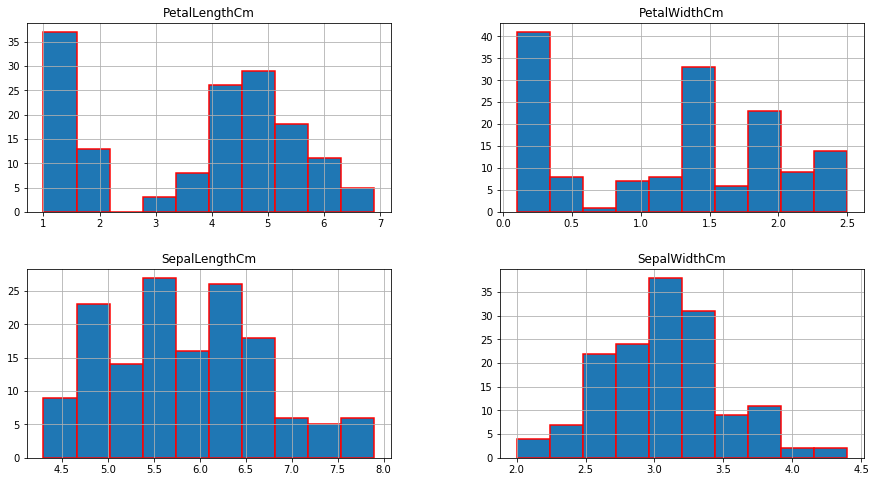

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
#TO check how the lengths and widths of the dataset are distributed; we use histograms
df.hist(edgecolor='red', linewidth=1.5)
fig1=plt.gcf()
fig1.set_size_inches(15,8)
plt.show()

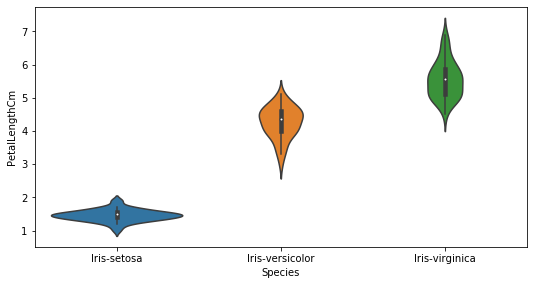

In [0]:
#To check how the lengths and widths vary according to each species
plt.figure(figsize=(30,15))
plt.subplot(3,3,2)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


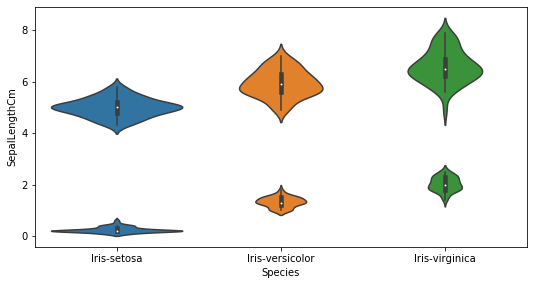

In [0]:
plt.figure(figsize=(30,15))
plt.subplot(3,3,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(3,3,2)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)

In [0]:
df.shape

(150, 5)

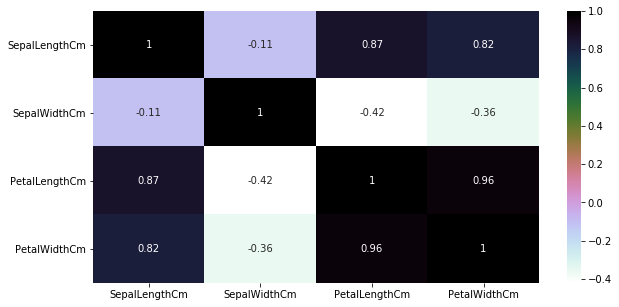

In [0]:
#Also, we can generate a heatmap to understand the correlations among the features of the dataset.
plt.figure(figsize=(10,5)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [0]:
#It means that the features are petal_length and petal_width are highly correlated.

In [0]:
#The given dataset challanges us to classify the problem into various species; hence it is a classification problem
#using various classification models like logistic regression and Knearest classifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#we split the dataset into train and test data to perform validation of the accuracies
from sklearn.model_selection import train_test_split

#To use 80% of the data for training and the rest 20% for testing; 
traindata, testdata = train_test_split(df, test_size = 0.2)
print(traindata.shape)
print(testdata.shape)


(120, 5)
(30, 5)


In [0]:
train_X = traindata[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_Y=traindata.Species
test_X= testdata[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_Y =testdata.Species

train_X.head(3)
train_Y.head(3)


35        Iris-setosa
37        Iris-setosa
139    Iris-virginica
Name: Species, dtype: object

In [0]:
test_X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
79,5.7,2.6,3.5,1.0
122,7.7,2.8,6.7,2.0
95,5.7,3.0,4.2,1.2


In [0]:
#To apply various classification algorithms on train data;
model=svm.SVC()
model.fit(train_X,train_Y)
predictResults=model.predict(test_X)
print("Accuracy of the model is:", metrics.accuracy_score(predictResults,test_Y))


Accuracy of the model is: 0.9666666666666667


In [0]:
model=DecisionTreeClassifier(criterion='gini')
model.fit(train_X,train_Y)
predictResults=model.predict(test_X)print("Accuracy of the model is:", metrics.accuracy_score(predictResults,test_Y))


Accuracy of the model is: 0.9333333333333333


In [0]:
model=KNeighborsClassifier(n_neighbors=4)
model.fit(train_X,train_Y)
predictResults=model.predict(test_X)
print("Accuracy of the model is:", metrics.accuracy_score(predictResults,test_Y))

Accuracy of the model is: 0.9333333333333333


In [0]:
model=LogisticRegression(dual=False)
model.fit(train_X,train_Y)
predictResults=model.predict(test_X)
print("Accuracy of the model is:", metrics.accuracy_score(predictResults,test_Y))

Accuracy of the model is: 0.9333333333333333


In [0]:
#Conclusion: Hence, we have used as many classification models as the average accuracy score is 93.33333333333, As the dataset is small with minimal number of features, I could achieve 
#good accuracy score without much parameter tuning and data processing.

# New Section